# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Wholesale_Data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


Region is, presumably some kind of location related information, but it's unclear to me what Channel means. Probably something to do with the store itself, but other than that I don't know. 

In [3]:
print('shape:',data.shape,'\n\nDuplicates check:',data.duplicated().value_counts(),
      '\n\nNull check:\n',data.isna().value_counts())
data.iloc[:,2:].describe()

shape: (440, 8) 

Duplicates check: False    440
Name: count, dtype: int64 

Null check:
 Channel  Region  Fresh  Milk   Grocery  Frozen  Detergents_Paper  Delicassen
False    False   False  False  False    False   False             False         440
Name: count, dtype: int64


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


There are tons of outliers in this data. Try removing based on (roughly) the values on the y axis of the boxplot. Removing _everything_ ouside the whiskers is not an option; that would be more than 80 rows, which is nearly 20% of the available data. Throwing out that much would dramatically reduce our sample size, so instead I'll remove the most extreme outliers.

<Axes: >

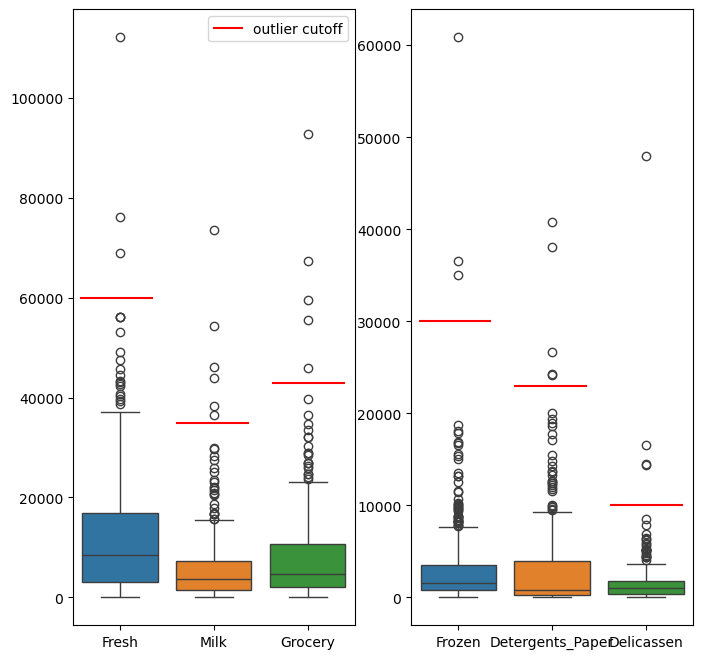

In [4]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.axhline(y=60000,xmin=0.03,xmax=0.28,color='red',label='outlier cutoff')
plt.axhline(y=35000,xmin=0.37,xmax=0.62,color='red')
plt.axhline(y=43000,xmin=0.71,xmax=0.96,color='red')
sns.boxplot(data[['Fresh','Milk','Grocery']])
plt.legend()

plt.subplot(1,2,2)
plt.axhline(y=30000,xmin=0.03,xmax=0.28,color='red')
plt.axhline(y=23000,xmin=0.37,xmax=0.62,color='red')
plt.axhline(y=10000,xmin=0.71,xmax=0.96,color='red')
sns.boxplot(data[['Frozen','Detergents_Paper','Delicassen']])

Checking that won't be more rows than expected...

In [5]:
# select rows where any of these conditions exists
data[ 
    (data['Fresh']>60000)|
    (data['Milk']>35000)|
    (data['Grocery']>43000)|
    (data['Frozen']>30000)|
    (data['Detergents_Paper']>23000)|
    (data['Delicassen']>10000)]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
23,2,3,26373,36423,22019,5154,4337,16523
47,2,3,44466,54259,55571,7782,24171,6465
61,2,3,35942,38369,59598,3254,26701,2017
65,2,3,85,20959,45828,36,24231,1423
71,1,3,18291,1266,21042,5373,4173,14472
85,2,3,16117,46197,92780,1026,40827,2944
86,2,3,22925,73498,32114,987,20070,903
87,1,3,43265,5025,8117,6312,1579,14351
93,1,3,11314,3090,2062,35009,71,2698
125,1,3,76237,3473,7102,16538,778,918


15 rows is a much smaller proportion of the total data (3%) and won't dramatically reduce the sample size. 

In [6]:
# drop those rows
data_cleaning = data.drop(data[
    (data['Fresh']>60000)|
    (data['Milk']>35000)|
    (data['Grocery']>43000)|
    (data['Frozen']>30000)|
    (data['Detergents_Paper']>23000)|
    (data['Delicassen']>10000)].index)

In [7]:
display(data_cleaning.shape)
data_cleaning.iloc[:,2:].describe()

(425, 8)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000
mean,11119.729412,5101.284706,7107.007059,2699.312941,2530.840000,1276.484706
std,10673.414000,5031.271448,7030.908941,3198.788656,3581.559621,1245.476084
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3087.000000,1492.000000,2128.000000,720.000000,256.000000,404.000000
50%,8090.000000,3587.000000,4602.000000,1483.000000,788.000000,925.000000
75%,16165.000000,7027.000000,9819.000000,3378.000000,3837.000000,1755.000000
max,56159.000000,29892.000000,39694.000000,18711.000000,19410.000000,7844.000000


<Axes: >

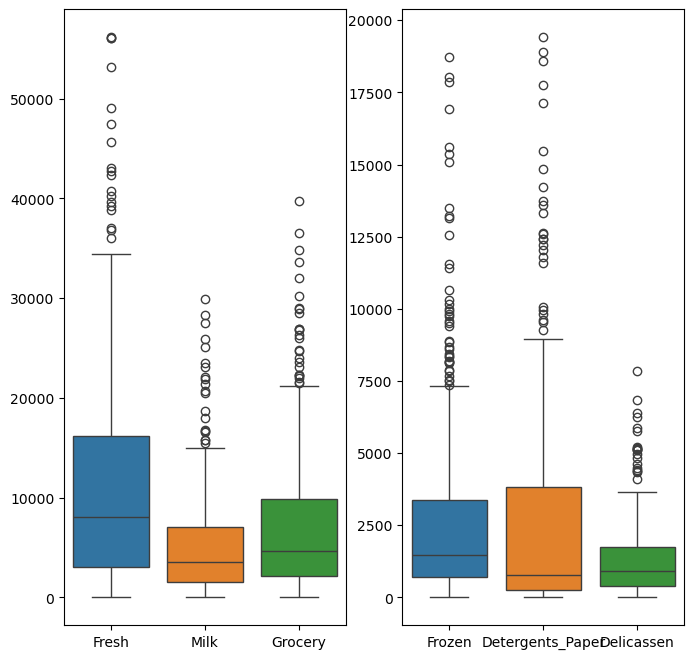

In [8]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
sns.boxplot(data_cleaning[['Fresh','Milk','Grocery']])

plt.subplot(1,2,2)
sns.boxplot(data_cleaning[['Frozen','Detergents_Paper','Delicassen']])

There are still a lot of outliers, but the standard deviations are a lot better, and there isn't enough data to be super strict. 

Text(0.5, 1.0, 'Totals by item type')

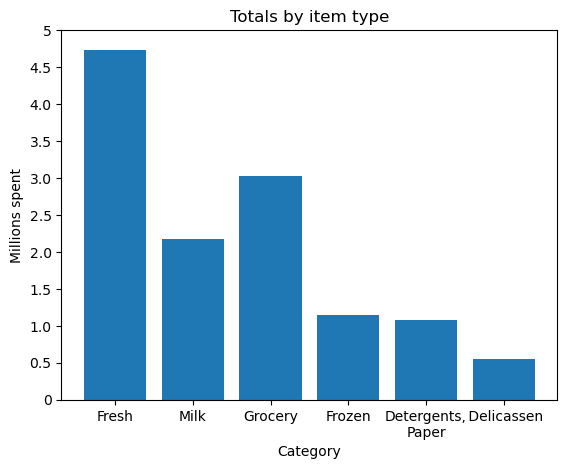

In [63]:
height = data_cleaning[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']].sum().tolist()
bars = ('Fresh','Milk','Grocery','Frozen','Detergents,\nPaper',' Delicassen')
x_pos = np.arange(len(bars))

plt.bar(x_pos,height)
plt.xticks(x_pos,bars)
plt.yticks(ticks=[0.0*1e6,0.5*1e6,1*1e6,1.5*1e6,2*1e6,2.5*1e6,3*1e6,3.5*1e6,4*1e6,4.5*1e6,5*1e6],labels=[0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5])
plt.ylabel('Millions spent')
plt.xlabel('Category')
plt.title('Totals by item type')

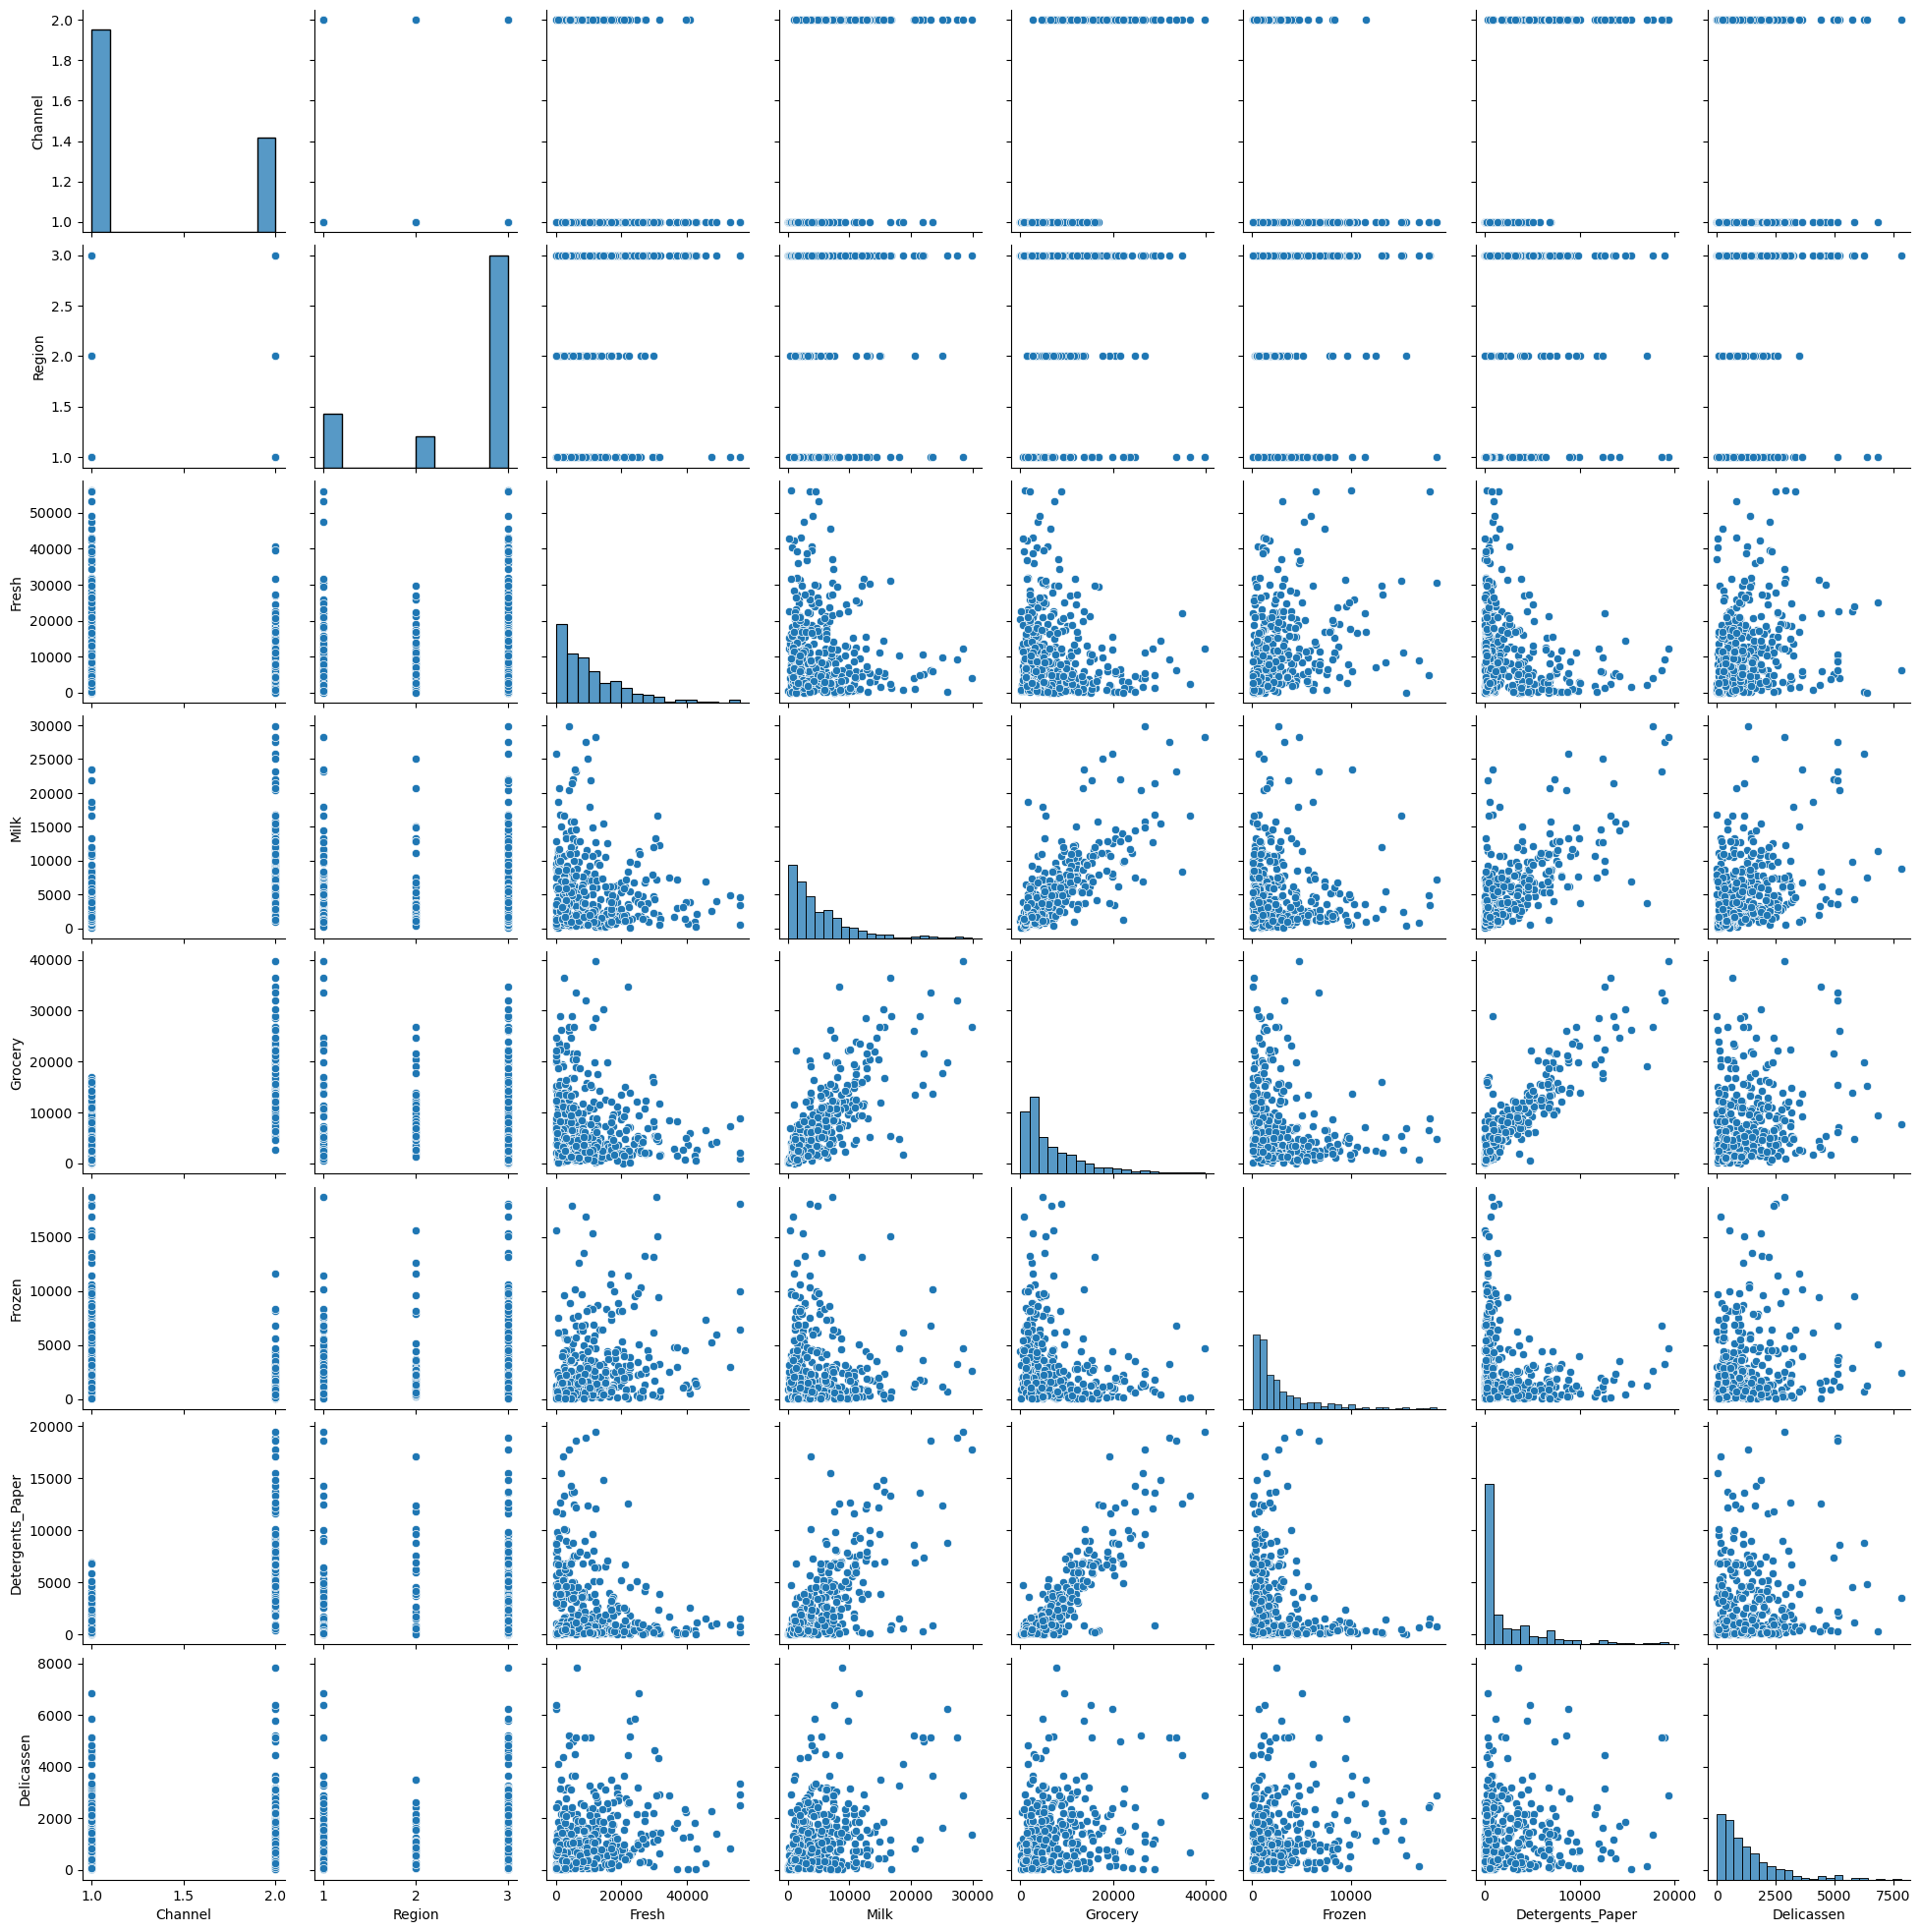

In [9]:
sns.pairplot(data_cleaning)

In [10]:
print('Correlation coefficients of note:')
print('Milk and Grocery:\n',np.corrcoef(data_cleaning['Milk'],data_cleaning['Grocery']))
print('Milk and Detergents_Paper:\n',np.corrcoef(data_cleaning['Milk'],data_cleaning['Detergents_Paper']))
print('Grocery and Detergents_Paper:\n',np.corrcoef(data_cleaning['Grocery'],data_cleaning['Detergents_Paper']))

Correlation coefficients of note:
Milk and Grocery:
 [[1.         0.76291734]
 [0.76291734 1.        ]]
Milk and Detergents_Paper:
 [[1.        0.6982356]
 [0.6982356 1.       ]]
Grocery and Detergents_Paper:
 [[1.         0.88637914]
 [0.88637914 1.        ]]


All other coefficients are below 0.5.

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaning)
data_scaled = pd.DataFrame(data_scaled)

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

In [13]:
from sklearn.cluster import KMeans
import os
os.environ["OMP_NUM_THREADS"]='1'
import warnings
warnings.filterwarnings('ignore')

Using the eblow method to find the optimal number of clusters:

In [14]:
def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=7)
        km.fit(X)
        distortions.append(km.inertia_)
        
    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 

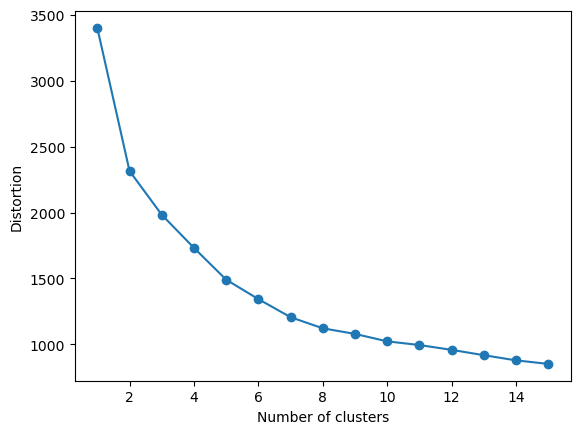

In [15]:
plot_distortion(data_scaled,max_clusters=15)

Optimum number of clusters is 5.

In [16]:
km = KMeans(n_clusters=5,  
            n_init=10,
            random_state=7)

In [17]:
km_out = km.fit_predict(data_scaled)

In [18]:
data_km = data_cleaning.copy()
data_km['clusters'] = km_out

Text(0.5, 1.0, 'Grocery and Detergents/Paper')

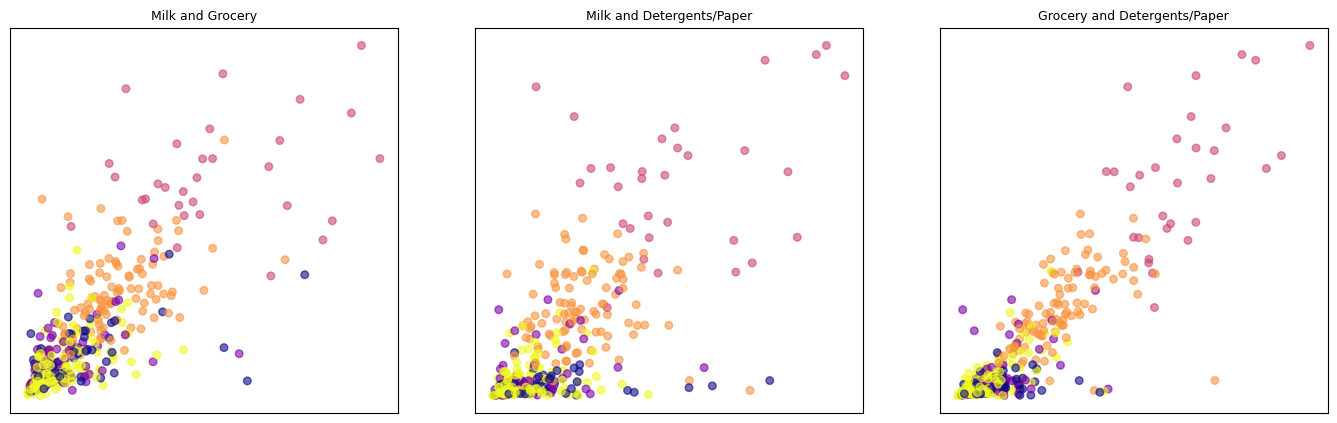

In [19]:
hue = data_km['clusters']
plt.figure(figsize=(17,5))

plt.subplot(1,3,1)
plt.scatter(data_km['Milk'], data_km['Grocery'], c=hue, cmap='plasma',alpha=0.6,s=30)
plt.xticks([])
plt.yticks([])
plt.title('Milk and Grocery',fontsize=9)

plt.subplot(1,3,2)
plt.scatter(data_km['Milk'], data_km['Detergents_Paper'], c=hue, cmap='plasma',alpha=0.6,s=30)
plt.xticks([])
plt.yticks([])
plt.title('Milk and Detergents/Paper',fontsize=9)

plt.subplot(1,3,3)
plt.scatter(data_km['Grocery'], data_km['Detergents_Paper'], c=hue, cmap='plasma',alpha=0.6,s=30)
plt.xticks([])
plt.yticks([])
plt.title('Grocery and Detergents/Paper',fontsize=9)

The clustering can't be seen clearly on a scatter plot, but this isn't surprising given there are 6 dimensions involved. <p>
We can also look at the means of each feature for each cluster:

In [20]:
data_km.groupby('clusters').mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
clusters,,,,,,,,
0,1.049180,2.672131,25642.967213,4303.819672,4331.901639,8116.032787,580.868852,1802.885246
1,1.052632,1.263158,10715.513158,3013.381579,3951.618421,2482.381579,938.026316,947.947368
2,2.000000,2.258065,5425.129032,15962.935484,24975.000000,1785.741935,12016.774194,2002.225806
3,1.969697,2.777778,8518.212121,7658.343434,11760.000000,1279.101010,4865.606061,1533.333333
4,1.006329,2.987342,8454.449367,2680.183544,3274.962025,1781.518987,725.753165,927.955696


And plot them for easier comparison:

Text(0.5, 1.0, 'Purchase types by cluster\n (KMeans)')

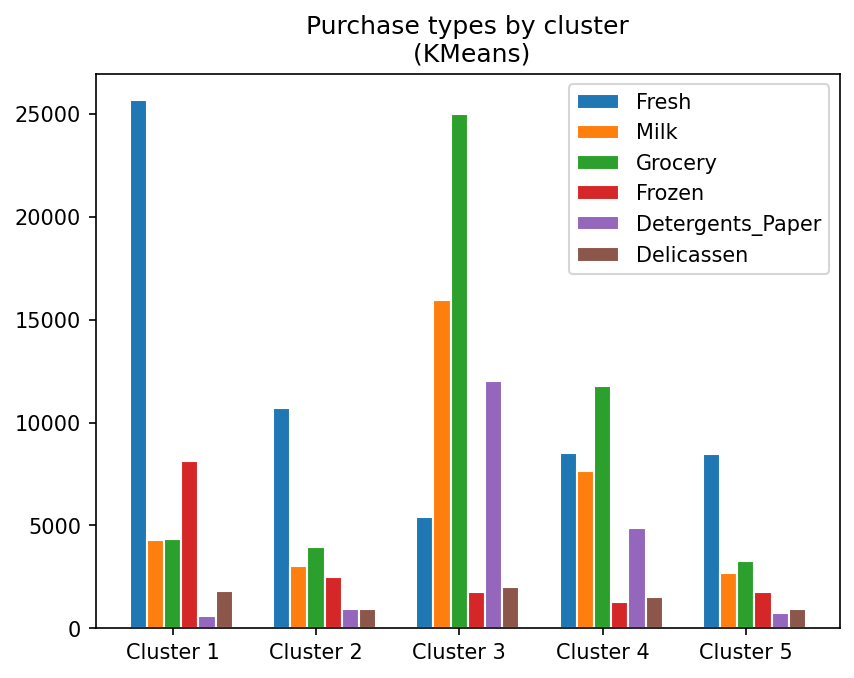

In [21]:
b_width = 0.12
bar1 = data_km.groupby('clusters').mean()['Fresh']
bar2 = data_km.groupby('clusters').mean()['Milk']
bar3 = data_km.groupby('clusters').mean()['Grocery']
bar4 = data_km.groupby('clusters').mean()['Frozen']
bar5 = data_km.groupby('clusters').mean()['Detergents_Paper']
bar6 = data_km.groupby('clusters').mean()['Delicassen']

x1 = np.arange(len(bar1))
x2 = x1 + b_width
x3 = x2 + b_width
x4 = x3 + b_width
x5 = x4 + b_width
x6 = x5 + b_width

fig, ax = plt.subplots(dpi=150)
ax.bar(x1,bar1,width=b_width,edgecolor='white',label='Fresh')
ax.bar(x2,bar2,width=b_width,edgecolor='white',label='Milk')
ax.bar(x3,bar3,width=b_width,edgecolor='white',label='Grocery')
ax.bar(x4,bar4,width=b_width,edgecolor='white',label='Frozen')
ax.bar(x5,bar5,width=b_width,edgecolor='white',label='Detergents_Paper')
ax.bar(x6,bar6,width=b_width,edgecolor='white',label='Delicassen')

ax.set_xticks(x2 + b_width)
ax.set_xticklabels(['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'])
ax.legend()
plt.title('Purchase types by cluster\n (KMeans)')

The most similar clusters seem to be 2 and 5. Clusters 1 and 3 are dramatically different than the others. 

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

In [22]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


I ran both ward and complete hierarchies, and they function slightly differently (and are the only two options that did anything interesting).


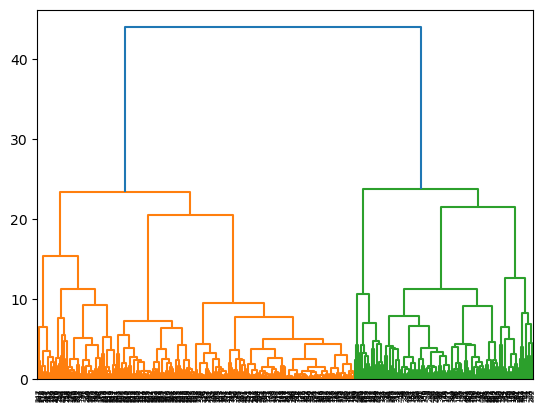

In [23]:
linked = linkage(data_scaled,method='ward')
dendrogram(linked)
threshold_distance = 20
clusters_ward = fcluster(linked, threshold_distance, criterion='distance')

First off, I cut ward off at 20, where the first significant distances occur on all branches.

Text(0.5, 1.0, 'Grocery and Detergents/Paper')

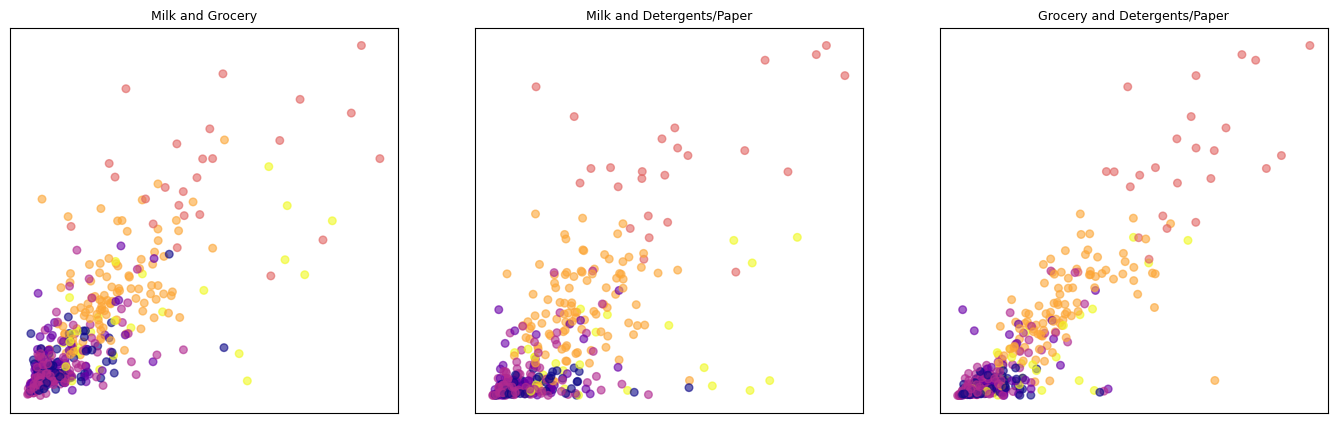

In [24]:
plt.figure(figsize=(17,5))

plt.subplot(1,3,1)
plt.scatter(data_scaled.iloc[:, 3], data_scaled.iloc[:, 4], c=clusters_ward, cmap='plasma',alpha=0.6,s=30)
plt.xticks([])
plt.yticks([])
plt.title('Milk and Grocery',fontsize=9)

plt.subplot(1,3,2)
plt.scatter(data_scaled.iloc[:, 3], data_scaled.iloc[:, 6], c=clusters_ward, cmap='plasma',alpha=0.6,s=30)
plt.xticks([])
plt.yticks([])
plt.title('Milk and Detergents/Paper',fontsize=9)

plt.subplot(1,3,3)
plt.scatter(data_scaled.iloc[:, 4], data_scaled.iloc[:, 6], c=clusters_ward, cmap='plasma',alpha=0.6,s=30)
plt.xticks([])
plt.yticks([])
plt.title('Grocery and Detergents/Paper',fontsize=9)

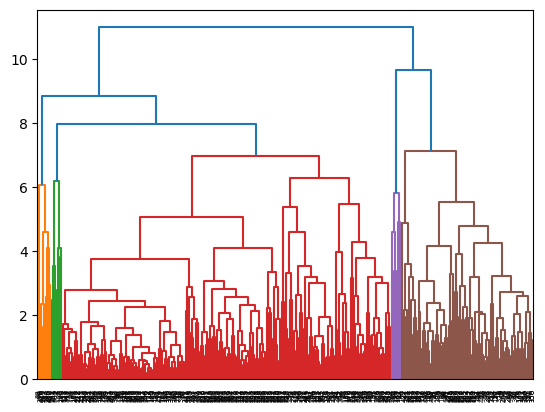

In [25]:
linked = linkage(data_scaled,method='complete')
dendrogram(linked)
threshold_distance = 8
clusters_comp = fcluster(linked, threshold_distance, criterion='distance')

I chose 8 to cut complete off at, because it seemed the best middle ground between the distances getting longer and total loss of complexity. (And the necessity of choosing an integer; 8.2 was not an option.)

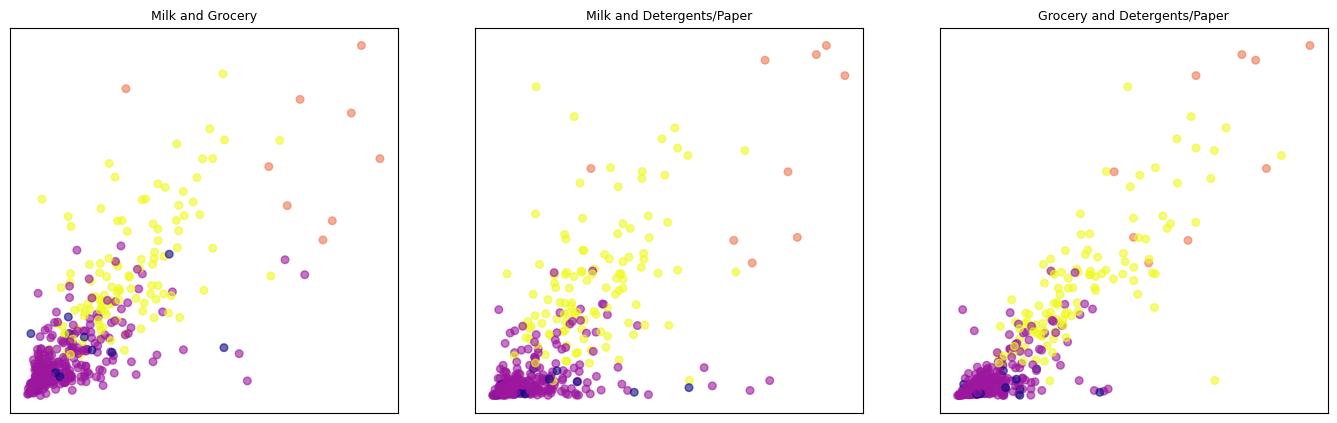

In [26]:
plt.figure(figsize=(17,5))

plt.subplot(1,3,1)
plt.scatter(data_scaled.iloc[:, 3], data_scaled.iloc[:, 4], c=clusters_comp, cmap='plasma',alpha=0.6,s=30)
plt.xticks([])
plt.yticks([])
plt.title('Milk and Grocery',fontsize=9)

plt.subplot(1,3,2)
plt.scatter(data_scaled.iloc[:, 3], data_scaled.iloc[:, 6], c=clusters_comp, cmap='plasma',alpha=0.6,s=30)
plt.xticks([])
plt.yticks([])
plt.title('Milk and Detergents/Paper',fontsize=9)

plt.subplot(1,3,3)
plt.scatter(data_scaled.iloc[:, 4], data_scaled.iloc[:, 6], c=clusters_comp, cmap='plasma',alpha=0.6,s=30)
plt.xticks([])
plt.yticks([])
plt.title('Grocery and Detergents/Paper',fontsize=9)

linked = linkage(data_scaled,method='complete')
threshold_distance = 8
clusters_comp = fcluster(linked, threshold_distance, criterion='distance')



Once again the scatter plots don't do a great job of showing how the clusters are grouped due to the effect of the multiple features. However, like with the KMeans groupings, we can look at the means for each feature and plot them on a graphs.

In [27]:
data_clusters = data_cleaning.copy()
data_clusters['ward_clusters'] = clusters_ward
data_clusters['comp_clusters'] = clusters_comp

In [28]:
data_clusters.groupby('comp_clusters').mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,ward_clusters
comp_clusters,,,,,,,,,
1,1.000000,2.583333,23888.833333,5026.416667,5618.333333,14901.916667,545.333333,1885.916667,1.000000
2,1.051546,2.494845,12452.116838,3220.034364,3818.975945,2749.470790,842.137457,1186.041237,2.704467
3,2.000000,2.444444,8093.444444,23407.555556,27991.222222,2449.888889,13819.888889,4106.333333,4.666667
4,1.982301,2.628319,6573.557522,8495.849558,14069.159292,1294.159292,6191.345133,1219.292035,4.787611


Text(0.5, 1.0, 'Purchase types by cluster\n (method: complete)')

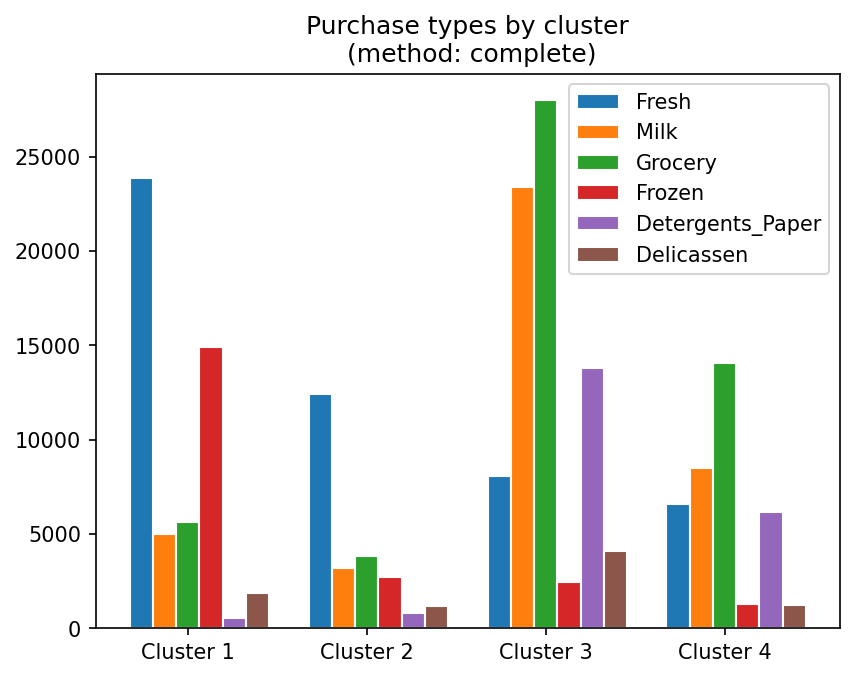

In [31]:
b_width = 0.13
bar1 = data_clusters.groupby('comp_clusters').mean()['Fresh']
bar2 = data_clusters.groupby('comp_clusters').mean()['Milk']
bar3 = data_clusters.groupby('comp_clusters').mean()['Grocery']
bar4 = data_clusters.groupby('comp_clusters').mean()['Frozen']
bar5 = data_clusters.groupby('comp_clusters').mean()['Detergents_Paper']
bar6 = data_clusters.groupby('comp_clusters').mean()['Delicassen']

x1 = np.arange(len(bar1))
x2 = x1 + b_width
x3 = x2 + b_width
x4 = x3 + b_width
x5 = x4 + b_width
x6 = x5 + b_width

fig, ax = plt.subplots(dpi=150)
ax.bar(x1,bar1,width=b_width,edgecolor='white',label='Fresh')
ax.bar(x2,bar2,width=b_width,edgecolor='white',label='Milk')
ax.bar(x3,bar3,width=b_width,edgecolor='white',label='Grocery')
ax.bar(x4,bar4,width=b_width,edgecolor='white',label='Frozen')
ax.bar(x5,bar5,width=b_width,edgecolor='white',label='Detergents_Paper')
ax.bar(x6,bar6,width=b_width,edgecolor='white',label='Delicassen')

ax.set_xticks(x2 + b_width)
ax.set_xticklabels(['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])
ax.legend()
plt.title('Purchase types by cluster\n (method: complete)')

In [32]:
data_clusters.groupby('ward_clusters').mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,comp_clusters
ward_clusters,,,,,,,,,
1,1.044118,2.529412,20361.147059,3324.294118,3536.647059,8093.352941,505.573529,1301.485294,1.823529
2,1.000000,1.328358,10848.701493,2716.283582,3863.910448,1870.641791,868.283582,906.089552,2.059701
3,1.000000,3.000000,8721.897810,2611.613139,3320.430657,1507.927007,804.503650,733.744526,2.000000
4,2.000000,2.160000,6175.200000,15661.360000,25551.440000,1885.320000,13063.480000,1661.640000,3.760000
5,2.000000,2.747475,8709.797980,7385.959596,11789.101010,1302.474747,4868.444444,1250.969697,3.838384
6,1.275862,2.689655,13893.586207,9636.827586,8975.793103,3064.241379,2216.310345,4392.655172,2.172414


Text(0.5, 1.0, 'Purchase types by cluster\n (method: ward)')

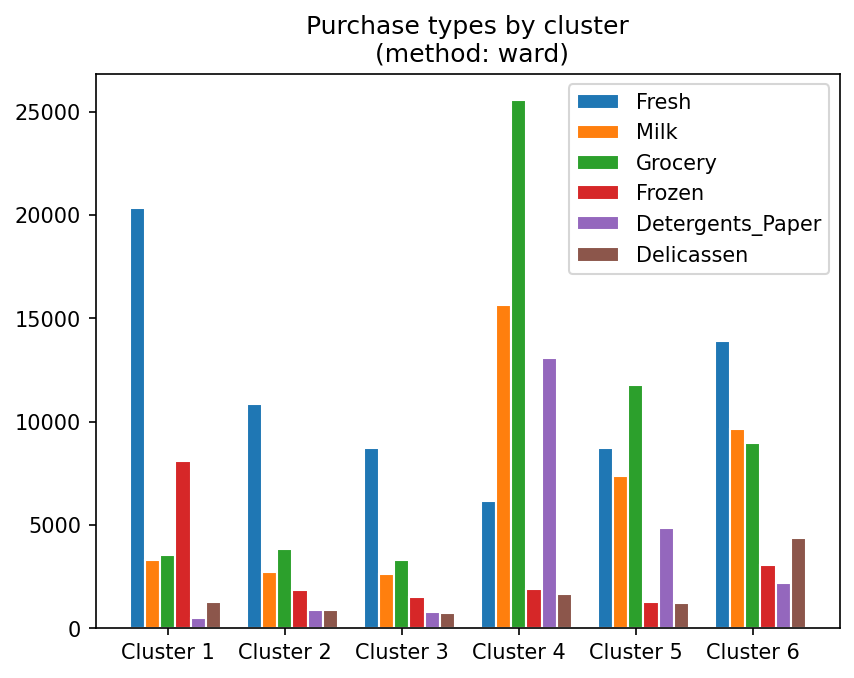

In [33]:
b_width = 0.13
bar1 = data_clusters.groupby('ward_clusters').mean()['Fresh']
bar2 = data_clusters.groupby('ward_clusters').mean()['Milk']
bar3 = data_clusters.groupby('ward_clusters').mean()['Grocery']
bar4 = data_clusters.groupby('ward_clusters').mean()['Frozen']
bar5 = data_clusters.groupby('ward_clusters').mean()['Detergents_Paper']
bar6 = data_clusters.groupby('ward_clusters').mean()['Delicassen']

x1 = np.arange(len(bar1))
x2 = x1 + b_width
x3 = x2 + b_width
x4 = x3 + b_width
x5 = x4 + b_width
x6 = x5 + b_width

fig, ax = plt.subplots(dpi=150)
ax.bar(x1,bar1,width=b_width,edgecolor='white',label='Fresh')
ax.bar(x2,bar2,width=b_width,edgecolor='white',label='Milk')
ax.bar(x3,bar3,width=b_width,edgecolor='white',label='Grocery')
ax.bar(x4,bar4,width=b_width,edgecolor='white',label='Frozen')
ax.bar(x5,bar5,width=b_width,edgecolor='white',label='Detergents_Paper')
ax.bar(x6,bar6,width=b_width,edgecolor='white',label='Delicassen')

ax.set_xticks(x2 + b_width)
ax.set_xticklabels(['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6'])
ax.legend()
plt.title('Purchase types by cluster\n (method: ward)')

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [34]:
from sklearn.decomposition import PCA

In [35]:
pca = PCA()
pca_out = pca.fit(data_scaled)

Text(0, 0.5, 'Explained variance ratio')

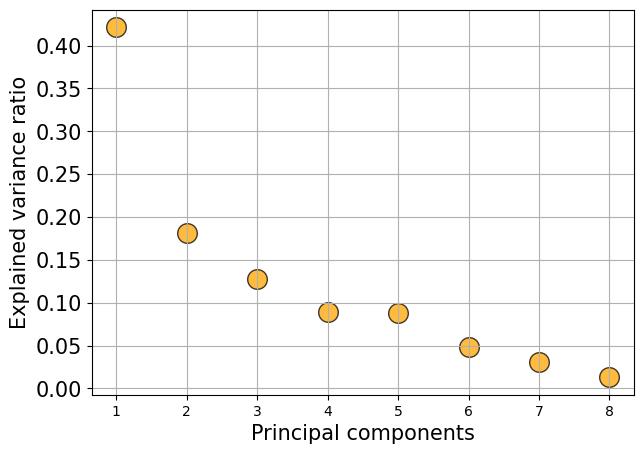

In [36]:
plt.figure(figsize=(7,5))
plt.scatter(x=[i+1 for i in range(len(pca_out.explained_variance_ratio_))],
            y=pca_out.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.xlabel("Principal components",fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)

Diminishing returns seem to start after 3, so that is where I am limiting the components. 

In [37]:
pca_use = PCA(n_components=3)
pca_transf = pca_use.fit_transform(data_scaled)
pca_transf = pd.DataFrame(pca_transf)

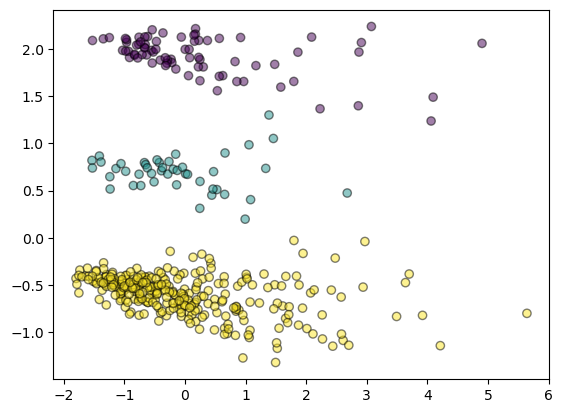

In [38]:
plt.scatter(pca_transf[1],pca_transf[2],c=data_scaled[1],alpha=0.5,edgecolors='k')

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

Text(0.5, 1.0, 'Purchase types by cluster (ward dendrogram)')

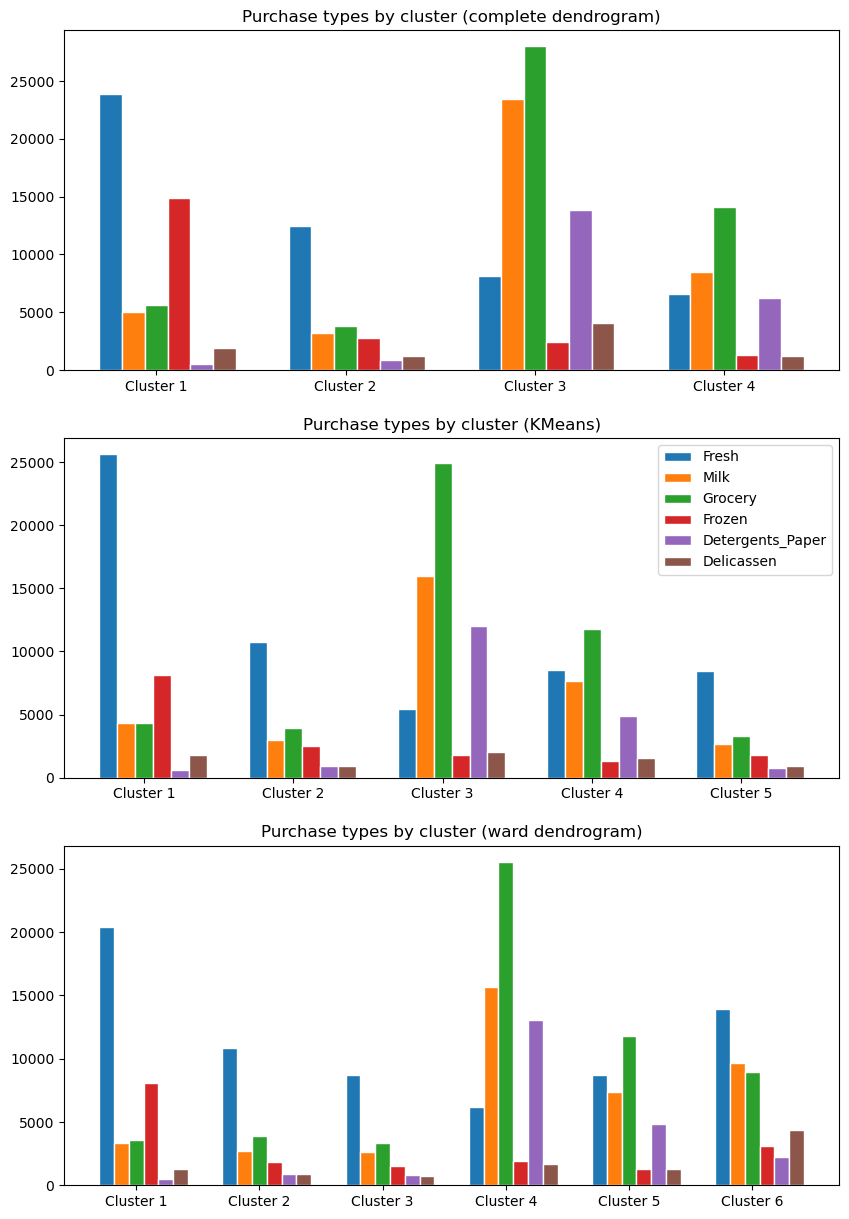

In [45]:
plt.figure(figsize=(10,15))

plt.subplot(3,1,1)
b_width = 0.12
bar1 = data_clusters.groupby('comp_clusters').mean()['Fresh']
bar2 = data_clusters.groupby('comp_clusters').mean()['Milk']
bar3 = data_clusters.groupby('comp_clusters').mean()['Grocery']
bar4 = data_clusters.groupby('comp_clusters').mean()['Frozen']
bar5 = data_clusters.groupby('comp_clusters').mean()['Detergents_Paper']
bar6 = data_clusters.groupby('comp_clusters').mean()['Delicassen']

x1 = np.arange(len(bar1))
x2 = x1 + b_width
x3 = x2 + b_width
x4 = x3 + b_width
x5 = x4 + b_width
x6 = x5 + b_width

plt.bar(x1,bar1,width=b_width,edgecolor='white',label='Fresh')
plt.bar(x2,bar2,width=b_width,edgecolor='white',label='Milk')
plt.bar(x3,bar3,width=b_width,edgecolor='white',label='Grocery')
plt.bar(x4,bar4,width=b_width,edgecolor='white',label='Frozen')
plt.bar(x5,bar5,width=b_width,edgecolor='white',label='Detergents_Paper')
plt.bar(x6,bar6,width=b_width,edgecolor='white',label='Delicassen')

plt.xticks(ticks=(x2 + b_width),labels=['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])
plt.title('Purchase types by cluster (complete dendrogram)',fontsize=12)


plt.subplot(3,1,2)
b_width = 0.12
bar1 = data_km.groupby('clusters').mean()['Fresh']
bar2 = data_km.groupby('clusters').mean()['Milk']
bar3 = data_km.groupby('clusters').mean()['Grocery']
bar4 = data_km.groupby('clusters').mean()['Frozen']
bar5 = data_km.groupby('clusters').mean()['Detergents_Paper']
bar6 = data_km.groupby('clusters').mean()['Delicassen']

x1 = np.arange(len(bar1))
x2 = x1 + b_width
x3 = x2 + b_width
x4 = x3 + b_width
x5 = x4 + b_width
x6 = x5 + b_width

plt.bar(x1,bar1,width=b_width,edgecolor='white',label='Fresh')
plt.bar(x2,bar2,width=b_width,edgecolor='white',label='Milk')
plt.bar(x3,bar3,width=b_width,edgecolor='white',label='Grocery')
plt.bar(x4,bar4,width=b_width,edgecolor='white',label='Frozen')
plt.bar(x5,bar5,width=b_width,edgecolor='white',label='Detergents_Paper')
plt.bar(x6,bar6,width=b_width,edgecolor='white',label='Delicassen')

plt.xticks(ticks=(x2 + b_width),labels=['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'])
plt.legend()
plt.title('Purchase types by cluster (KMeans)',fontsize=12)


plt.subplot(3,1,3)
b_width = 0.12
bar1 = data_clusters.groupby('ward_clusters').mean()['Fresh']
bar2 = data_clusters.groupby('ward_clusters').mean()['Milk']
bar3 = data_clusters.groupby('ward_clusters').mean()['Grocery']
bar4 = data_clusters.groupby('ward_clusters').mean()['Frozen']
bar5 = data_clusters.groupby('ward_clusters').mean()['Detergents_Paper']
bar6 = data_clusters.groupby('ward_clusters').mean()['Delicassen']

x1 = np.arange(len(bar1))
x2 = x1 + b_width
x3 = x2 + b_width
x4 = x3 + b_width
x5 = x4 + b_width
x6 = x5 + b_width

plt.bar(x1,bar1,width=b_width,edgecolor='white',label='Fresh')
plt.bar(x2,bar2,width=b_width,edgecolor='white',label='Milk')
plt.bar(x3,bar3,width=b_width,edgecolor='white',label='Grocery')
plt.bar(x4,bar4,width=b_width,edgecolor='white',label='Frozen')
plt.bar(x5,bar5,width=b_width,edgecolor='white',label='Detergents_Paper')
plt.bar(x6,bar6,width=b_width,edgecolor='white',label='Delicassen')

plt.xticks(ticks=(x2 + b_width),labels=['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6'])
plt.title('Purchase types by cluster (ward dendrogram)',fontsize=12)

- using `PCA` to reduce dimensionality, an apparently clean separation into 3 clusters is possible
- regardless of how many clusters the other methods produced, they consistently have clusters around the customers who purchase large amounts of Fresh or large amounts of Grocery
- the most obviously distinct-at-a-glance clusters are from KMeans, which is predicatable, as there are less of them, but even at 6 clusters they are all reasonably distinct
- 'Fresh' is the category people spend the most on by a sizable margin, followed by grocery and then milk. Depending on what all counts as 'milk', that might be a very outsized amount. 